# ELG7113 Machine Learning for Adaptive and Intelligent Control Systems

Student: Derek Boase

Std Num: 300043860

e-mail: dboas065@uottawa.ca

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from numpy import transpose as trans
from numpy.linalg import inv

np.set_printoptions(suppress=True)

# Question 1

Importing the raw data into a dataframe so that it can be visualized  

In [2]:
data = pd.read_csv('dataHw1.csv', header=None).to_numpy()
time = data[:,[0]]
vals = data[:,[1]]
time -= 1  # Assume the the variable t starts from 0

Plotting the data to get an idea of what it looks like

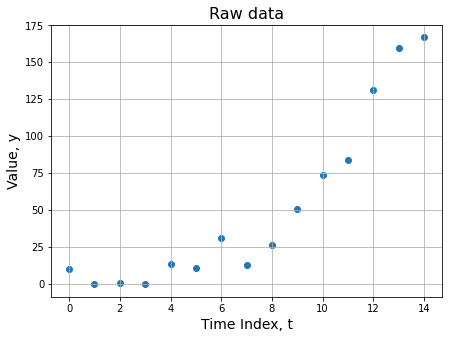

In [3]:
plt.figure(figsize=(7, 5))
plt.scatter(time, vals)
plt.title('Raw data', fontsize=16)
plt.xlabel('Time Index, t', fontsize=14)
plt.ylabel('Value, y', fontsize=14)
plt.grid()
plt.savefig('pictures/q1/raw_data.jpg', bbox_inches='tight')
plt.show()

## Q1.1

This fucntion takes in the matrix $\Phi$ corresponding to the number of parameters that the model has and returns a vector of estimated parameters, $\hat{\theta}$

In [4]:
def theta_hat(Phi, targets=vals):
    """Takes in Phi and y(t), a vector of current and previous regressors and the real outputs, and returns the 
    current value of the parameters
    """
#     The following block of code was implemented as a check to make sure the answers were consistent.
#     This implements equation 2.9 from the text

#     P = inv(trans(Phi) @ Phi)
#     row, col = Phi.shape
#     temp = np.zeros((col, 1))
#     for phi, y in zip(Phi, targets):
#         temp += np.array([trans(phi).reshape(-1,1) @ y]).reshape(-1, 1)
#     check = P @ temp

    return (inv(trans(Phi) @ Phi)) @ (trans(Phi) @ targets)  # Implementation of equation 2.6 from the text

The following block of code creates a matrix assuming 5 parameters. For each model, this matrix is sliced and only the columns that correspond to the number of parameters in that model are used

In [5]:
Phi = np.zeros((1,5))
Phi[0][0] = 1
for t in np.arange(1, 15):
    Phi = np.concatenate((Phi, np.array([t**0, t**1, t**2, t**3, t**4]).reshape(1,5)), axis=0)

Note that the function that is called by model p (theta_hat) takes in $\Phi(k)$ with p columns, for $p\ \epsilon \{1, 2, 3, 4, 5\}$ and returns the result of equation 2.6 in the textbook. 
$$\hat{\theta}(k) = (\Phi(k)^T\Phi(k))^{-1}\Phi(k)^TY(k)$$

### Model 1

Model assuming that $\varphi^T = (t^0)$ and $\hat{\theta} = b_0$.

In [6]:
Phi1 = Phi[:, 0].reshape(-1, 1)  # Slicing only the first column of Phi matrix
theta1 = theta_hat(Phi1)

### Model 2

Model assuming that $\varphi^T = (t^0\ t^1)$ and $\hat{\theta} = (b_0\ b_1)^T$.

In [7]:
Phi2 = Phi[:, 0:2]  # Slicing only the first two column of Phi matrix
theta2 = theta_hat(Phi2)

### Model 3

Model assuming that $\varphi^T = (t^0\ t^1\ t^2)$ and $\hat{\theta} = (b_0\ b_1\ b_2)^T$.

In [8]:
Phi3 = Phi[:, 0:3]  # Slicing first three column of Phi matrix
theta3 = theta_hat(Phi3)

### Model 4

Model assuming that $\varphi^T = (t^0\ t^1\ t^2\ t^3)$ and $\hat{\theta} = (b_0\ b_1\ b_2\ b_3)^T$.

In [9]:
Phi4 = Phi[:, 0:4]  # Slicing first four column of Phi matrix
theta4 = theta_hat(Phi4)

### Model 5

Model assuming that $\varphi^T = (t^0\ t^1\ t^2\ t^3\ t^4)$ and $\hat{\theta} = (b_0\ b_1\ b_2\ b_3\ b_4)^T$.

In [10]:
Phi5 = Phi[:, 0:5]  # Slicing first five column of Phi matrix
theta5 = theta_hat(Phi5)

This block below is dedicated strictly to organizing and printing the data.

In [11]:
row1 = np.pad(theta1.reshape(-1,), (0, 4), mode='constant')
row2 = np.pad(theta2.reshape(-1,), (0, 3), mode='constant')
row3 = np.pad(theta3.reshape(-1,), (0, 2), mode='constant')
row4 = np.pad(theta4.reshape(-1,), (0, 1), mode='constant')
row5 = theta5.reshape(-1,)
parameters = np.array([row1,
                      row2,
                      row3,
                      row4,
                      row5])

data_1 = pd.DataFrame(data=parameters, 
                      index=np.arange(1, 6),
                     columns=['b0', 'b1', 'b2', 'b3', 'b4'])
data_1.index.name = 'Model'
data_1

,b0,b1,b2,b3,b4
Model,,,,,
1,51.435013,0.000000,0.000000,0.000000,0.000000
2,-31.106229,11.791606,0.000000,0.000000,0.000000
3,11.150564,-7.711529,1.393081,0.000000,0.000000
4,8.137128,-4.576673,0.813574,0.027596,0.000000
5,4.234310,3.497340,-1.992023,0.346007,-0.011372


## Q1.2

The "estimates" function uses equation 2.1 to estimate the output of the system. That is, 
$$\hat{y}(k) = \varphi^T(k)\theta(k)$$

The "square_error" function returns the square of the residual. 
$$\big(y(k) - \hat{y}(k)\big)^2$$

In [12]:
def estimates(Phi_func, theta_func):
    """Takes in the current value of the vector of regressors and the current value of the parameters and returns
    the estimated output"""
    # This function takes in the 
    return (Phi_func.reshape(1, -1) @ theta_func).reshape(1,)
    
def square_error(y_func, epsilon):
    """Takes in the current value of the output and the systems estimate of the output and returns the square 
    of the residual"""
    return np.array([np.square(y_func - epsilon)]).reshape(1,)

The for loop in the block below loops through all values of k and calculates all the estimates, $\hat{y}(k)$, and squares of the residuals, $\big(y(k) - \hat{y}(k)\big)^2$. 

Following the for loop, the loss function is found using equation 2.2 from the textbook, 
$$V(\hat{\theta}, k) = \frac{1}{2} \sum_{i=1}^{t}\big(y(k) - \hat{y}(k)\big)^2$$

In [13]:
y1_lse, y2_lse, y3_lse, y4_lse, y5_lse = (0, 0, 0, 0, 0)
for t, y in zip(time, vals):
    if t == 0:
        y1 = estimates(Phi[int(t), 0:1], theta1)        
        y2 = estimates(Phi[int(t), 0:2], theta2)        
        y3 = estimates(Phi[int(t), 0:3], theta3)        
        y4 = estimates(Phi[int(t), 0:4], theta4)
        y5 = estimates(Phi[int(t), 0:5], theta5)
        
    else:
        y1 = np.concatenate((y1, estimates(Phi[int(t), 0:1], theta1)), axis=0)
        y2 = np.concatenate((y2, estimates(Phi[int(t), 0:2], theta2)), axis=0)
        y3 = np.concatenate((y3, estimates(Phi[int(t), 0:3], theta3)), axis=0)
        y4 = np.concatenate((y4, estimates(Phi[int(t), 0:4], theta4)), axis=0)
        y5 = np.concatenate((y5, estimates(Phi[int(t), 0:5], theta5)), axis=0)
        
    y1_lse += square_error(y, estimates(Phi[int(t), 0:1], theta1))
    y2_lse += square_error(y, estimates(Phi[int(t), 0:2], theta2))
    y3_lse += square_error(y, estimates(Phi[int(t), 0:3], theta3))
    y4_lse += square_error(y, estimates(Phi[int(t), 0:4], theta4))
    y5_lse += square_error(y, estimates(Phi[int(t), 0:5], theta5))
        
        
loss = (1/2*np.array([y1_lse, y2_lse, y3_lse, y4_lse, y5_lse])).reshape(-1,)

In [14]:
data_1['V'] = pd.Series(data=loss, index=data_1.index)
data_1

,b0,b1,b2,b3,b4,V
Model,,,,,,
1,51.435013,0.000000,0.000000,0.000000,0.000000,24103.092840
2,-31.106229,11.791606,0.000000,0.000000,0.000000,4637.216740
3,11.150564,-7.711529,1.393081,0.000000,0.000000,634.251379
4,8.137128,-4.576673,0.813574,0.027596,0.000000,612.440363
5,4.234310,3.497340,-1.992023,0.346007,-0.011372,563.290183


From the table above we see that model 4 is the first new model that doesn't have at least an order of magnitude imporvement with respect to the previous model. Although it is tempting to suppose that model 5 performs best as it has the lowest loss function, caution needs to be taken to ensure the parameter choice is not one that causes overfitting. For this reason model 3 is chosen. The model is then, 

$$ \hat{y}(k) = \varphi^T(k)(11.150564\ -7.711529\ 1.393081)^T\ +\ e(k)$$

where $e(k)\sim N(0,11)$. It should be noted that the theory dictates a choise of parameters that minimize the loss function, but with noise added to this system (especially with the large standard deviation) too many parameters may lead to the model learning the noise rather than the trend (overfitting).

This block is dedicated to printing the different estimated outputs overlayn on eachother for comparison. 

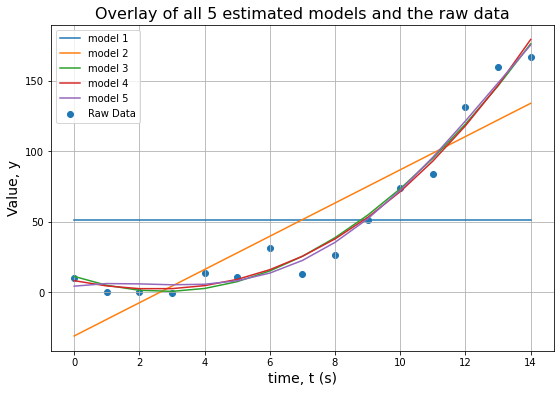

In [15]:
plt.figure(figsize=(9, 6))
plt.scatter(time, vals)
plt.plot(time, y1)
plt.plot(time, y2)
plt.plot(time, y3)
plt.plot(time, y4)
plt.plot(time, y5)
plt.xlabel('time, t (s)', fontsize=14)
plt.ylabel('Value, y', fontsize=14)
plt.title('Overlay of all 5 estimated models and the raw data', fontsize=16)
plt.legend(['model 1',
            'model 2',
            'model 3',
            'model 4',
            'model 5', 
            'Raw Data'])
plt.grid()
plt.show()

The plot of model 3 and the raw data is shown below

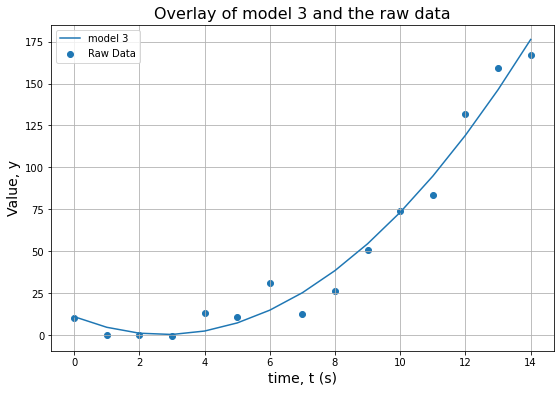

In [16]:
plt.figure(figsize=(9, 6))
plt.scatter(time, vals)
plt.plot(time, y3)
plt.xlabel('time, t (s)', fontsize=14)
plt.ylabel('Value, y', fontsize=14)
plt.title('Overlay of model 3 and the raw data', fontsize=16)
plt.legend(['model 3',
            'Raw Data'])
plt.grid()
plt.show()

## Q1.3

To find the unbiased estimate of the standard deviation for each model we take the square root of (iii) from Theorem 2.2 in the textbook. This is done as follows:
$$\hat{\sigma} = \sqrt{\frac{2V(\hat{\theta}, k)}{t - n}}$$

In [17]:
N = np.arange(1, 6)
sigma_hat = []
for n, _2V in zip(N, 2*loss):
    sigma_hat.append(np.sqrt(_2V/(len(time) - n)))
sigma_hat = np.array(sigma_hat).reshape(-1,)

In [18]:
data_1['std. dev.'] = pd.Series(data=sigma_hat, index=data_1.index)
data_1

,b0,b1,b2,b3,b4,V,std. dev.
Model,,,,,,,
1,51.435013,0.000000,0.000000,0.000000,0.000000,24103.092840,58.679630
2,-31.106229,11.791606,0.000000,0.000000,0.000000,4637.216740,26.709885
3,11.150564,-7.711529,1.393081,0.000000,0.000000,634.251379,10.281467
4,8.137128,-4.576673,0.813574,0.027596,0.000000,612.440363,10.552383
5,4.234310,3.497340,-1.992023,0.346007,-0.011372,563.290183,10.614049


These results represent the unbiased estimation of the standard devaition of the signals. The expected value of this estimation should be equal to the standard deviation of the signals due to noise from the true function, which is given as $\sigma = 11$. Given this, we choose model 5 as it is the closest to the true value of the standard deviation associated with the data. We may also recall that it had the lowest loss function.

# Question 2

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from numpy import transpose as trans
from numpy.random import normal
from numpy.linalg import inv
from numpy import cos, sin

## Q2.1

Before finding the parameters, we rearrange the equation to solve for $\varphi$ and $\theta$. The model may be written as,
$$y(t) = -a_1y(t-1) - a_2y(t-2) + b_0u(t-1) + b_1u(t-2) + e(t)$$
where is $e(k)\sim N(0, 0.65)$
We can see that,
$$\varphi^T(t) = \big(-y(t-1)\ -y(t-2)\ u(t-1)\ u(t-2)\big)$$
and, 
$$\theta = \big(a_1\ a_2\ b_0\ b_1\big)$$
Then,
$$\hat{y}(t) = \varphi^T(t)\theta + e(t)$$

This block is an initialization block that is used to define the inputs, true values and all the constants used for the code.

In [20]:
a1_true, a2_true, b0_true, b1_true, std_dev = 1.3, 0.75, 1.1, -0.35, 0.65

recursion_length = 1500
time = np.arange(2*recursion_length + 1)

# Delayed Kronecker delta input
delta = np.zeros(time.shape)
delta[np.where(time == 100)] = 1

# Delayed step input
step = np.zeros((99))
step = np.concatenate((step, np.ones(2*recursion_length - 98,)))

This function recursively executes the equations in Theorem 2.3 performing the following calculations
$$\hat{\theta}(t) = \hat{\theta}(t-1) + K(t)\big(y(t)-\phi^T(t)\hat{\theta}(t-1)\big)$$
$$K(t) = P(t-1)\phi(t)\big(I+\phi^T(t)P(t-1)\phi(t)\big)^{-1}$$
$$P(t) = \big(I -K(t)\phi^T(t)\big)P(t-1)$$
The function takes in $\hat{\theta}(t-1)$ and $P(t-1)$ and returns $\hat{\theta}(t)$ and $P(t)$.

In [21]:
def rls(theta_m1, P_m1, a1=a1_true, a2 = a2_true, b0=b0_true, b1=b1_true, sig=std_dev):
    """This function takes in the previous values of theta and P and recursively finds the next values 
    in accordance with Theorem 2.3 in the textbook.
    """
    global idx, N, y, u, a1_hat, a2_hat, b0_hat, b1_hat, residual
    
    y[idx] = -a1*y[idx - 1] -a2*y[idx - 2] + b0*u[idx - 1] + b1*u[idx - 2] + normal(scale=sig)
    
    phi = np.array([[-y[idx - 1]],
                   [-y[idx - 2]],
                   [u[idx - 1]],
                   [u[idx - 2]]]) 
    
    K = P_m1 @ phi @ inv(np.eye(1) + trans(phi) @ P_m1 @ phi) 
    P = (np.eye(len(phi)) - K @ trans(phi)) @ P_m1
    theta = theta_m1 + K @ (y[idx] - trans(phi) @ theta_m1)
    
    a1_hat.append(float(theta[0]))
    a2_hat.append(float(theta[1]))
    b0_hat.append(float(theta[2]))
    b1_hat.append(float(theta[3]))

    
    idx += 1
    if idx == N + 1:
        return theta, P
    else:
        return rls(theta, P)

### Parameter Estimation with Delayed Kronecker Delta Input

This block takes the input $\delta(t-100)$ and attempts to estimate the parameters. Note that since the recursive function only accepts values where all the terms are defined, the first two outputs and associated value are defined outside the function.

In [22]:
# Initial conditions for t = 0
y = np.zeros(time.shape)
y[0] = normal(scale=std_dev)
theta_naught = np.zeros((4,1))
P_naught = 100 * np.eye(4)

# Initial conditions for t = 1
y[1] = -a1_true*y[0] + normal(scale=std_dev)
phi = np.array([[-y[0]],
               [0],
               [0],
               [0]]).reshape(4, -1)
K_1 = P_naught @ phi @ inv(np.eye(1) + trans(phi) @ P_naught @ phi)
P_1 = (np.eye(4) - K_1 @ trans(phi)) @ P_naught
theta_1 = theta_naught + K_1 @ (y[1] - trans(phi) @ theta_naught)

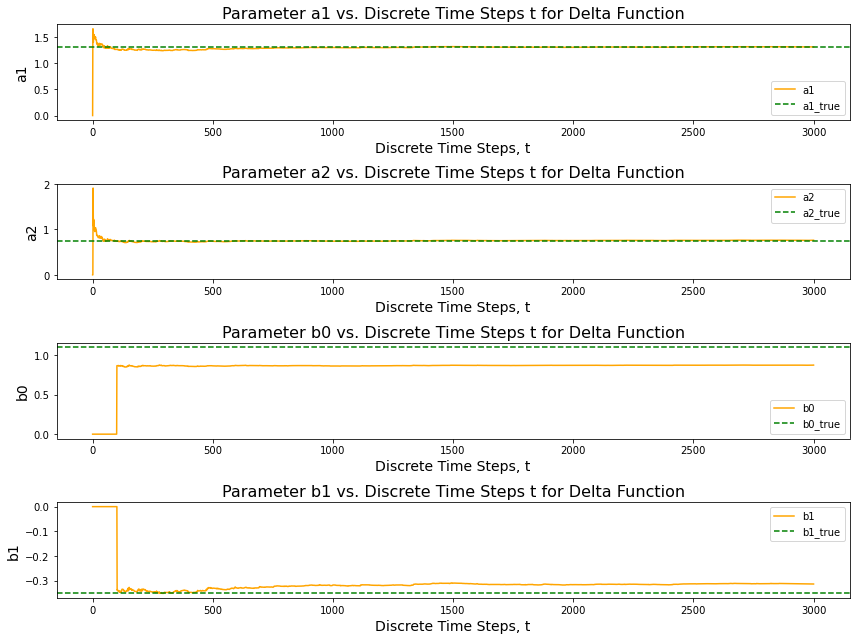

The final values are:
a1 = [1.30643095]
a2 = [0.7607638]
b0 = [0.87509438]
b1 = [-0.31383148]


In [23]:
idx = 1
N = recursion_length
u = delta
a1_hat, a2_hat, b0_hat, b1_hat = [0], [0], [0], [0]

params, P = rls(theta_1, P_1)
N += recursion_length
params, P_delta = rls(params, P)

plt.figure(figsize=(12, 9))
plt.subplot(4, 1, 1)
plt.plot(time, a1_hat, 'orange')
plt.axhline(y=a1_true, color ="green", linestyle ="--")
plt.title('Parameter a1 vs. Discrete Time Steps t for Delta Function', fontsize=16)
plt.xlabel('Discrete Time Steps, t', fontsize=14)
plt.ylabel('a1', fontsize=14)
plt.legend(['a1', 'a1_true'])

plt.subplot(4, 1, 2)
plt.plot(time, a2_hat, 'orange')
plt.axhline(y=a2_true, color ="green", linestyle ="--")
plt.title('Parameter a2 vs. Discrete Time Steps t for Delta Function', fontsize=16)
plt.xlabel('Discrete Time Steps, t', fontsize=14)
plt.ylabel('a2', fontsize=14)
plt.legend(['a2', 'a2_true'])

plt.subplot(4, 1, 3)
plt.plot(time, b0_hat, 'orange')
plt.axhline(y=b0_true, color ="green", linestyle ="--")
plt.title('Parameter b0 vs. Discrete Time Steps t for Delta Function', fontsize=16)
plt.xlabel('Discrete Time Steps, t', fontsize=14)
plt.ylabel('b0', fontsize=14)
plt.legend(['b0', 'b0_true'])

plt.subplot(4, 1, 4)
plt.plot(time, b1_hat, 'orange')
plt.axhline(y=b1_true, color ="green", linestyle ="--")
plt.title('Parameter b1 vs. Discrete Time Steps t for Delta Function', fontsize=16)
plt.xlabel('Discrete Time Steps, t', fontsize=14)
plt.ylabel('b1', fontsize=14)
plt.legend(['b1', 'b1_true'])

plt.tight_layout()
plt.show()

print(f'''The final values are:
a1 = {params[0]}
a2 = {params[1]}
b0 = {params[2]}
b1 = {params[3]}''')

It may be seen from the above graphs and printouts that that $a_1$ and $a_2$ converge to the true values, but $b_0$ and $b_1$ don't. This phenomena is attributed to the fact that the signal contains Gaussian noise, which sufficiently excites the a parameters, however the stagnant input, $\delta(t-100)$ doesn't vary enough to allow the b parameters to be learned accurately. The behaviour that was observed is expected.

### Parameter Estimation with Delayed Step Input

This block takes the input $u(t-100)$ and attempts to estimate the parameters. Note that since the recursive function only accepts values where all the terms are defined, the first two outputs and associated value are defined outside the function.

In [24]:
# Initial conditions for t = 0
y = np.zeros(time.shape)
y[0] = normal(scale=std_dev)
theta_naught = np.zeros((4,1))
P_naught = 100 * np.eye(4)

# Initial conditions for t = 1
y[1] = -a1_true*y[0] + normal(scale=std_dev)
phi = np.array([[-y[0]],
               [0],
               [0],
               [0]]).reshape(4, -1)
K_1 = P_naught @ phi @ inv(np.eye(1) + trans(phi) @ P_naught @ phi)
P_1 = (np.eye(4) - K_1 @ trans(phi)) @ P_naught
theta_1 = theta_naught + K_1 @ (y[1] - trans(phi) @ theta_naught)

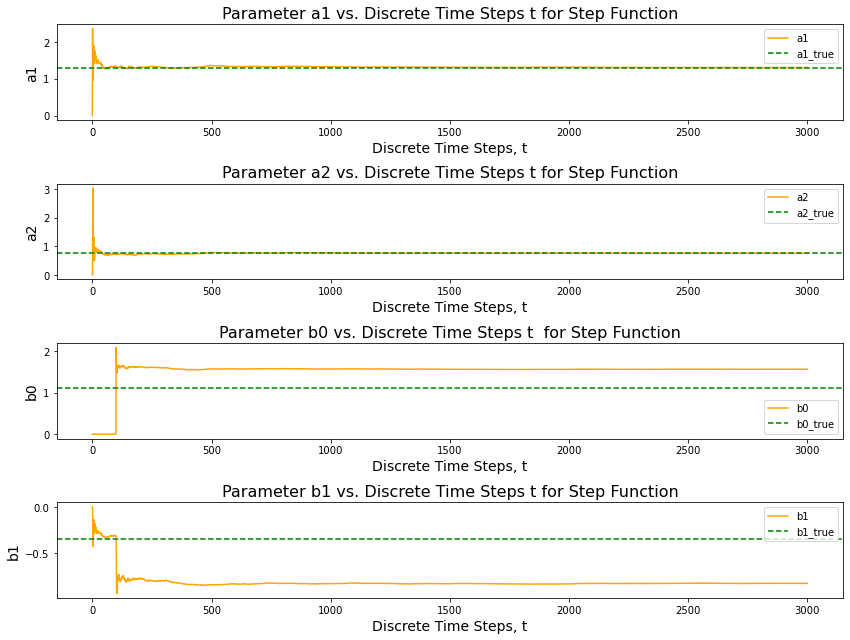

The final values are:
a1 = [1.30153045]
a2 = [0.75077609]
b0 = [1.5612984]
b1 = [-0.81986784]


In [25]:
idx = 1
N = recursion_length
u = step
a1_hat, a2_hat, b0_hat, b1_hat = [0], [0], [0], [0]

params, P = rls(theta_1, P_1)
N += recursion_length
params, P_step = rls(params, P)

plt.figure(figsize=(12, 9))
plt.subplot(4, 1, 1)
plt.plot(time, a1_hat, 'orange')
plt.axhline(y=a1_true, color ="green", linestyle ="--")
plt.title('Parameter a1 vs. Discrete Time Steps t for Step Function', fontsize=16)
plt.xlabel('Discrete Time Steps, t', fontsize=14)
plt.ylabel('a1', fontsize=14)
plt.legend(['a1', 'a1_true'])

plt.subplot(4, 1, 2)
plt.plot(time, a2_hat, 'orange')
plt.axhline(y=a2_true, color ="green", linestyle ="--")
plt.title('Parameter a2 vs. Discrete Time Steps t for Step Function', fontsize=16)
plt.xlabel('Discrete Time Steps, t', fontsize=14)
plt.ylabel('a2', fontsize=14)
plt.legend(['a2', 'a2_true'])

plt.subplot(4, 1, 3)
plt.plot(time, b0_hat, 'orange')
plt.axhline(y=b0_true, color ="green", linestyle ="--")
plt.title('Parameter b0 vs. Discrete Time Steps t  for Step Function', fontsize=16)
plt.xlabel('Discrete Time Steps, t', fontsize=14)
plt.ylabel('b0', fontsize=14)
plt.legend(['b0', 'b0_true'])

plt.subplot(4, 1, 4)
plt.plot(time, b1_hat, 'orange')
plt.axhline(y=b1_true, color ="green", linestyle ="--")
plt.title('Parameter b1 vs. Discrete Time Steps t for Step Function', fontsize=16)
plt.xlabel('Discrete Time Steps, t', fontsize=14)
plt.ylabel('b1', fontsize=14)
plt.legend(['b1', 'b1_true'])

plt.tight_layout()
plt.show()

print(f'''The final values are:
a1 = {params[0]}
a2 = {params[1]}
b0 = {params[2]}
b1 = {params[3]}''')

The delayed step input behaves very much like the delayed delta input. The a parameters again converge due to the excitation caused by the Gaussian noise. The b parameters again do not converge to the true values, although they do converge, due to lack of stimulation. The variation in both delta and step input functions was insufficient. For such a model a more constantly varying input signal is required.

## Q2.2

From Theorem 2.7, it is given that the input signal, $u(k)$ is persistently exciting of order n if and only if,
$$U=\lim_{t->\infty}\frac{1}{t}\sum_{k=1}^{t}\big(A(q)u(k)\big)^2>0\qquad \forall \text{ polynomials of order }n-1\text{ or less}$$
Using Paseval's theorem,
$$\lim_{t->\infty}\frac{1}{t}\sum_{k=1}^{t}\big(A(q)u(k)\big)^2 = \frac{1}{2\pi}\int_{-\pi}^\pi\big|A(e^{j\omega})\big|^2\Phi_u(\omega)d\omega$$

For a polynomial of order $n - 1$ the equation above will always be positive for all $\Phi_u(\omega)\neq0$. Looking at the input we note that the spectrum of $\Phi_u(\omega)$ is given by the Fourrier transform 
$$\sin\big(\frac{2\pi}{5}t\big) + cos\big(\frac{4\pi}{5}t\big) \rightarrow - j\pi\big[\delta\big(\omega - \frac{2\pi}{5}\big) - \delta\big(\omega + \frac{2\pi}{5}\big)\big] + \pi\big[\delta\big(\omega - \frac{4\pi}{5}\big) + \delta\big(\omega + \frac{4\pi}{5}\big)\big]$$

It is clear that $-\pi\leq\frac{2\pi}{5} < \frac{4\pi}{5}\leq\pi$ and thus in the interval $[-\pi,\ \pi]$ there are exactly 4 non-zeros contributions of $\Phi_u(\omega)$ and by the frequency domain characterization, the input is persistently exciting of order 4.

## Q2.3

In [26]:
# Multi-frequency input signal
mfs = np.array([1])
for t in time[1:]:
    mfs = np.concatenate((mfs, np.array([sin((2*np.pi)/5*t) + cos((4*np.pi)/5*t)])), axis=0)

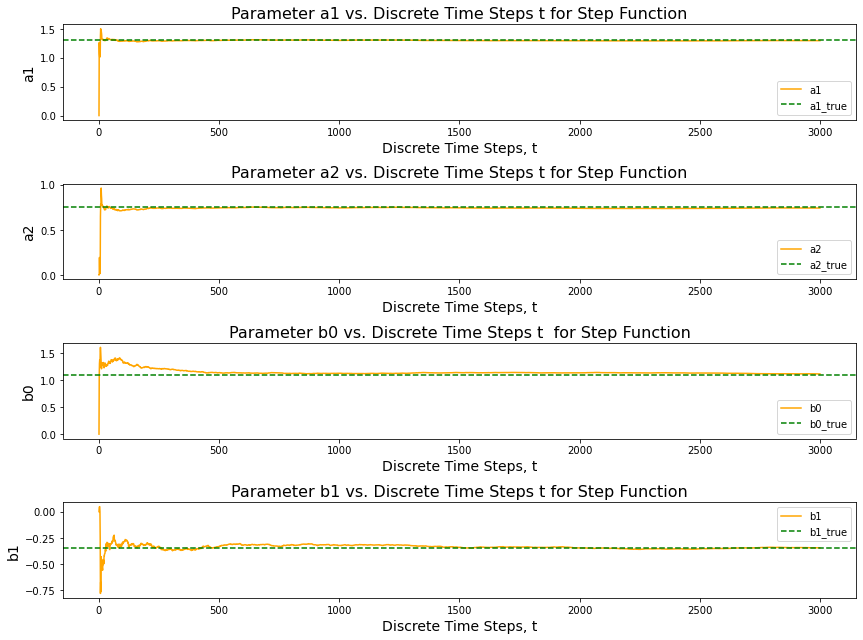

The final values are:
a1 = [1.29447597]
a2 = [0.74105059]
b0 = [1.11308259]
b1 = [-0.3462294]


In [27]:
idx = 1
N = recursion_length
u = mfs
a1_hat, a2_hat, b0_hat, b1_hat = [0], [0], [0], [0]

# Initial conditions for t = 0
y = np.zeros(time.shape)
y[0] = normal(scale=std_dev)
theta_naught = np.zeros((4,1))
P_naught = 100 * np.eye(4)

# Initial conditions for t = 1
y[1] = -a1_true*y[0] + b0_true*u[0] + normal(scale=std_dev)
phi = np.array([[-y[0]],
               [0],
               [u[0]],
               [0]]).reshape(4, -1)
K_1 = P_naught @ phi @ inv(np.eye(1) + trans(phi) @ P_naught @ phi)
P_1 = (np.eye(4) - K_1 @ trans(phi)) @ P_naught
theta_1 = theta_naught + K_1 @ (y[1] - trans(phi) @ theta_naught)

params, P = rls(theta_1, P_1)
N += recursion_length
params, P_mfs = rls(params, P)

plt.figure(figsize=(12, 9))
plt.subplot(4, 1, 1)
plt.plot(time, a1_hat, 'orange')
plt.axhline(y=a1_true, color ="green", linestyle ="--")
plt.title('Parameter a1 vs. Discrete Time Steps t for Step Function', fontsize=16)
plt.xlabel('Discrete Time Steps, t', fontsize=14)
plt.ylabel('a1', fontsize=14)
plt.legend(['a1', 'a1_true'])

plt.subplot(4, 1, 2)
plt.plot(time, a2_hat, 'orange')
plt.axhline(y=a2_true, color ="green", linestyle ="--")
plt.title('Parameter a2 vs. Discrete Time Steps t for Step Function', fontsize=16)
plt.xlabel('Discrete Time Steps, t', fontsize=14)
plt.ylabel('a2', fontsize=14)
plt.legend(['a2', 'a2_true'])

plt.subplot(4, 1, 3)
plt.plot(time, b0_hat, 'orange')
plt.axhline(y=b0_true, color ="green", linestyle ="--")
plt.title('Parameter b0 vs. Discrete Time Steps t  for Step Function', fontsize=16)
plt.xlabel('Discrete Time Steps, t', fontsize=14)
plt.ylabel('b0', fontsize=14)
plt.legend(['b0', 'b0_true'])

plt.subplot(4, 1, 4)
plt.plot(time, b1_hat, 'orange')
plt.axhline(y=b1_true, color ="green", linestyle ="--")
plt.title('Parameter b1 vs. Discrete Time Steps t for Step Function', fontsize=16)
plt.xlabel('Discrete Time Steps, t', fontsize=14)
plt.ylabel('b1', fontsize=14)
plt.legend(['b1', 'b1_true'])

plt.tight_layout()
plt.show()

print(f'''The final values are:
a1 = {params[0]}
a2 = {params[1]}
b0 = {params[2]}
b1 = {params[3]}''')

Unlike the previous inputs, it is clear that the system now converges to the true values for all parameters. As predicted earlier, this is due to the fact that the input is persistently exciting of order 4 as shown in Q2.2.

## Q2.4

To find the standard deviation of the parameters, we use the following, 
$$\sigma_{\hat{j}}=\sigma\sqrt{P_{m,m}}$$
Where $j\ \epsilon\ \{a,\ b\}$ and m represents the associated index in the P matrix

In [28]:
sigma_delta = std_dev*np.sqrt(np.array([[P_delta[2][2]],
                                        [P_delta[3][3]]]))
sigma_step = std_dev*np.sqrt(np.array([[P_step[2][2]],
                                       [P_step[3][3]]]))
sigma_mfs = std_dev*np.sqrt(np.array([[P_mfs[2][2]],
                                      [P_mfs[3][3]]]))

In [29]:
data_2 = pd.DataFrame(np.concatenate((sigma_delta, sigma_step, sigma_mfs), axis=1), 
                      columns=['Delta', 'Step', 'MFS'], 
                      index=['b0', 'b1'])

In [30]:
data_2

,Delta,Step,MFS
b0,0.646802,0.457406,0.014298
b1,0.646800,0.457382,0.017377


## Q2.5

We note that the model is expressed as a stable tranfer function model with uncorrelated noise and parameters of polynomial $A(q)$ and $B(q)$ fit by least squares. We also note that the degA + degB + 1 = 4 = persistent excitation order of the input signal, $u(k)$, and that the order of the estimated parameters are the same order as the true system. From this, we may note that,
$$\lim_{t->\infty}\frac{1}{t}\Phi^T\Phi$$ is positive definite. This implies that matrix $C_n$ has limits that exist.